In [1]:
#General
import re
import sys
import pprint
import seaborn as sb
import numpy   as np
import pandas  as pd
import random  as rnd

from os.path import isfile
from copy    import deepcopy
from time    import time
from tqdm    import tqdm
from getdist import plots
from bios    import read

from scipy.interpolate import interp1d
from scipy.stats       import multivariate_normal
from itertools         import repeat

from getdist import plots,loadMCSamples,MCSamples

from theory_code.distance_theory import TheoryCalcs

#Plotting
import matplotlib
import matplotlib.pyplot as plt


from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 18})

red    = '#8e001c'
yellow = '#ffb302'

sidelegend = {'bbox_to_anchor': (1.04,0.5), 
              'loc': "center left",
              'frameon': False}
bottomlegend = {'bbox_to_anchor': (0.35,-0.2), 
                'loc': "center left",
                'frameon': False,
                'ncols': 3}

In [2]:
from analysis.chains_analysis import Analyzer

# $\Lambda$CDM limit

In [3]:
fiducial = {'omegam': 0.2977,
            'H0': 68.51}

stats = Analyzer(fiducial)

chains = {r'$\Delta$CDM ($\Delta=0$)': {'path': 'chains/DCDM/DCDM_BAO_LCDMlimit',
                                 'sampler': 'Nautilus',
                                 'color': yellow,
                                 'filled': True},
          r'$\Lambda$CDM': {'path': 'chains/standard/LCDM_DESI',
                               'sampler': 'Nautilus',
                               'color': 'black',
                               'filled': True},
         }

In [4]:
analyzed_chains = {}
for name,sets in chains.items():
    try:
        analyzed_chains[name] = stats.analyze_chain(name,sets)
    except:
        print('')
        print('{} not available'.format(name))
        print('')


 Analyzing $\Delta$CDM ($\Delta=0$) 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.2986\pm 0.0082          $\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02218\pm 0.00054        $\\

{\boldmath$H_0            $} & $68.84\pm 0.53             $\\

{\boldmath$r_\mathrm{d}   $} & $147.6\pm 1.3              $\\

{\boldmath$\Omega_\Lambda $} & $0.7014\pm 0.0082          $\\
\hline
\end{tabular}
no .minimum file available for $\Delta$CDM ($\Delta=0$). Switching to best sample
Best sample unavailable for some reason. Using means as best fit (DO NOT TRUST THIS!)
Best fit chi2 not available

 Analyzing $\Lambda$CDM 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.2980^{+0.0077}_{-0.0088}$\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02217\pm 0.00055        $\\

{\boldmath$H_0            $} & $68.54\pm 0.58             $\\

{\boldmath$\Omega_\mathrm{c} h^2$} & $0.1172\pm 0.0047          $\\

{\boldmath$

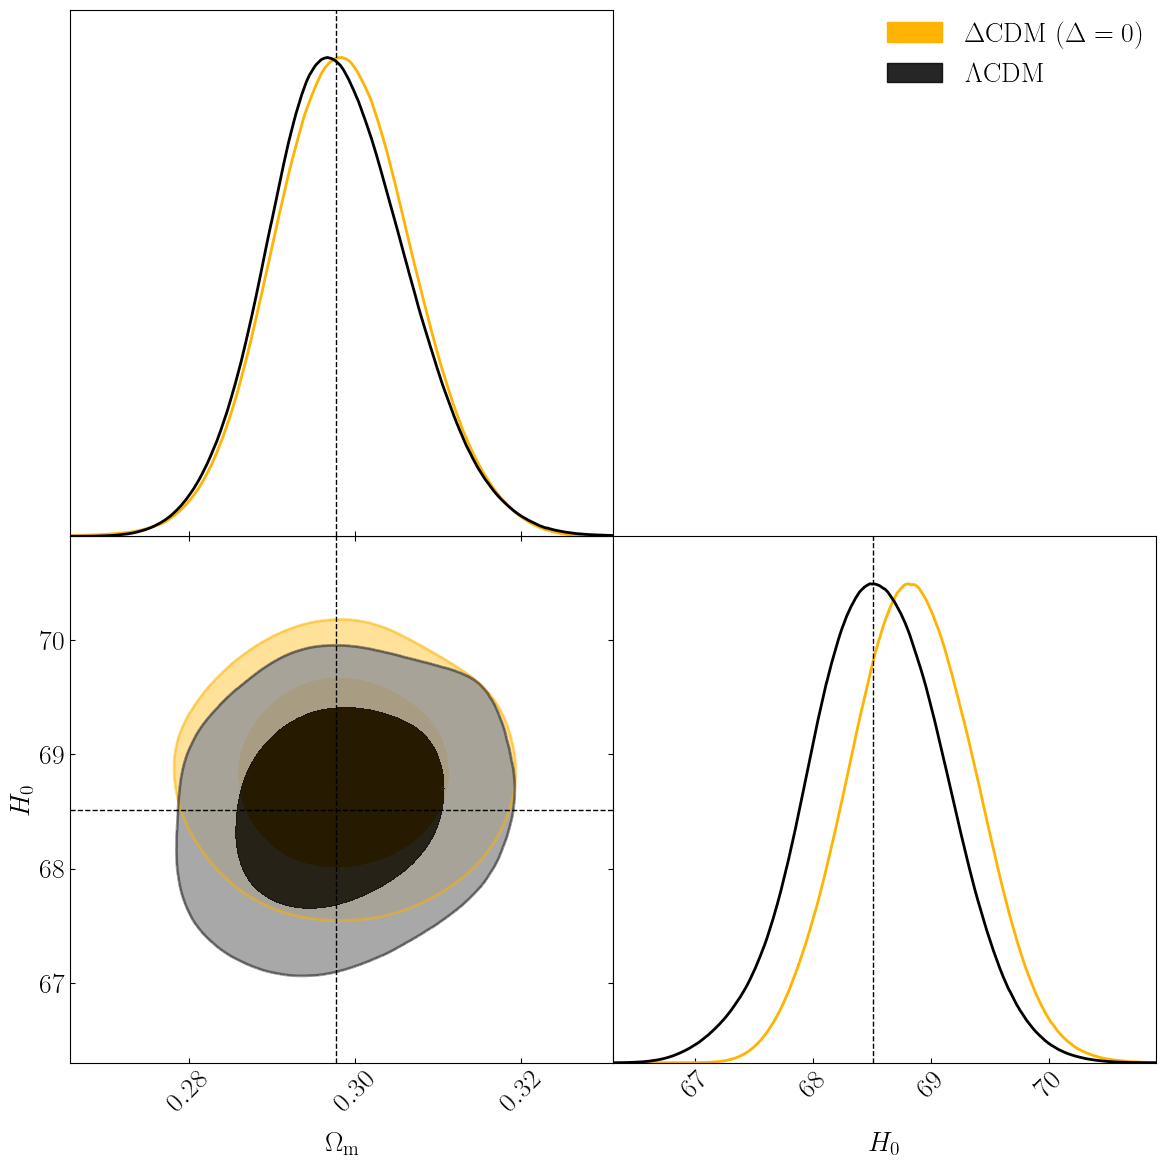

In [5]:
if len(analyzed_chains) > 0:
    g = plots.get_subplot_plotter(subplot_size=1,width_inch=12, scaling=False)
    g.settings.figure_legend_frame = False
    g.settings.axes_fontsize=20
    g.settings.axes_labelsize=20
    g.settings.legend_fontsize=20
    g.settings.axis_marker_color = 'black'
    g.settings.axis_marker_ls = '--'
    g.settings.axis_marker_lw = 1
    g.settings.axis_tick_x_rotation = 45
    g.triangle_plot([result['sample'] for result in analyzed_chains.values()], fiducial.keys(),
        filled=[result['filled'] for result in analyzed_chains.values()],
        legend_loc='upper right',
        legend_labels=[name for name in analyzed_chains.keys()],
        contour_colors=[result['color'] for result in analyzed_chains.values()],
        contour_lws=2,
        markers=fiducial)
    g.fig.align_ylabels()
    g.fig.align_xlabels();

# Data combination

## No DDR violation

In [6]:
fiducial = {'omegam': 0.2977,
            'H0': 68.51,
            'Delta': 0.,
            'Xi': 0.}

stats = Analyzer(fiducial)

chains = {r'DESI $\Delta$CDM': {'path': 'chains/DCDM/DCDM_BAO_nogamma',
                               'sampler': 'Nautilus',
                               'color': red,
                               'filled': True},
          r'Pantheon $\Delta$CDM': {'path': 'chains/DCDM/DCDM_SN_nogamma',
                               'sampler': 'Nautilus',
                               'color': yellow,
                               'filled': True},
          r'DESI+Pantheon $\Delta$CDM': {'path': 'chains/DCDM/DCDM_BAO_SN_nogamma',
                               'sampler': 'Nautilus',
                               'color': 'black',
                               'filled': True},
         }

In [7]:
analyzed_chains = {}
for name,sets in chains.items():
    try:
        analyzed_chains[name] = stats.analyze_chain(name,sets)
    except:
        print('')
        print('{} not available'.format(name))
        print('')


 Analyzing DESI $\Delta$CDM 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.332^{+0.035}_{-0.040}   $\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02219\pm 0.00054        $\\

{\boldmath$H_0            $} & $70.6\pm 2.1               $\\

{\boldmath$\Delta         $} & $-0.075\pm 0.084           $\\

{\boldmath$r_\mathrm{d}   $} & $142.7\pm 5.6              $\\

{\boldmath$\Omega_\Lambda $} & $0.668^{+0.040}_{-0.035}   $\\

{\boldmath$\Xi            $} & $-0.075\pm 0.084           $\\
\hline
\end{tabular}
no .minimum file available for DESI $\Delta$CDM. Switching to best sample
Best sample unavailable for some reason. Using means as best fit (DO NOT TRUST THIS!)
Best fit chi2 not available

 Analyzing Pantheon $\Delta$CDM 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.386^{+0.063}_{-0.046}   $\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02218\pm 0.00056        $\\

{\boldmath$H_0           

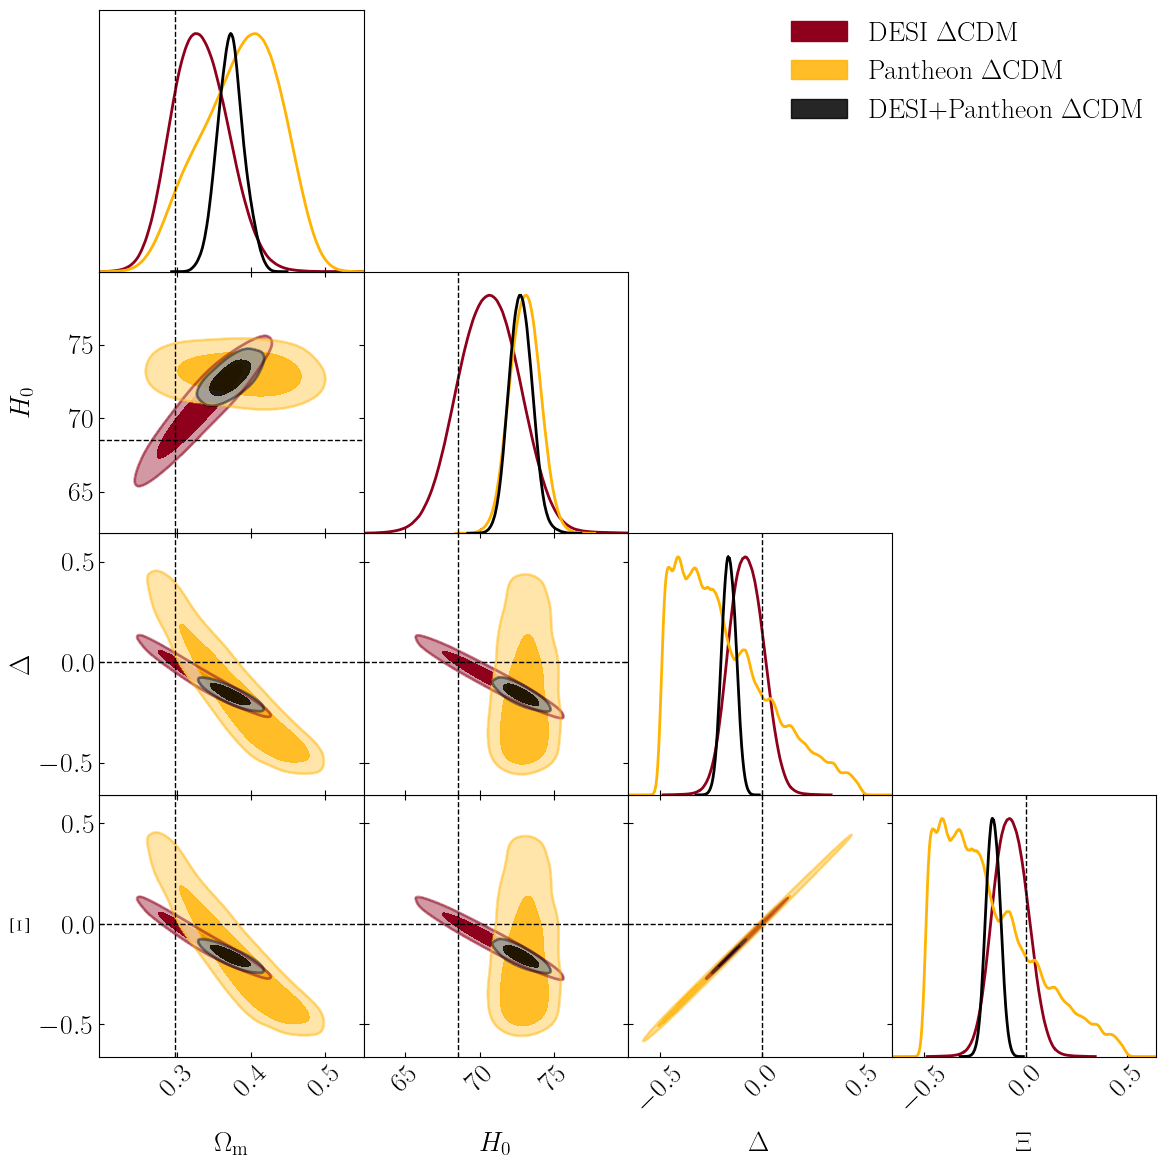

In [8]:
if len(analyzed_chains) > 0:
    g = plots.get_subplot_plotter(subplot_size=1,width_inch=12, scaling=False)
    g.settings.figure_legend_frame = False
    g.settings.axes_fontsize=20
    g.settings.axes_labelsize=20
    g.settings.legend_fontsize=20
    g.settings.axis_marker_color = 'black'
    g.settings.axis_marker_ls = '--'
    g.settings.axis_marker_lw = 1
    g.settings.axis_tick_x_rotation = 45
    g.triangle_plot([result['sample'] for result in analyzed_chains.values()], fiducial.keys(),
        filled=[result['filled'] for result in analyzed_chains.values()],
        legend_loc='upper right',
        legend_labels=[name for name in analyzed_chains.keys()],
        contour_colors=[result['color'] for result in analyzed_chains.values()],
        contour_lws=2,
        markers=fiducial)
    g.fig.align_ylabels()
    g.fig.align_xlabels();

## Free $\Gamma$ case

In [9]:
fiducial = {'omegam': 0.2977,
            'H0': 68.51,
            'Delta': 0.,
            'Gamma': 0.,
            'Xi': 0.}

stats = Analyzer(fiducial)

chains = {r'DESI $\Delta$CDM': {'path': 'chains/DCDM/DCDM_BAO',
                               'sampler': 'Nautilus',
                               'color': red,
                               'filled': True},
          r'Pantheon $\Delta$CDM': {'path': 'chains/DCDM/DCDM_SN',
                               'sampler': 'Nautilus',
                               'color': yellow,
                               'filled': True},
          r'DESI+Pantheon $\Delta$CDM': {'path': 'chains/DCDM/DCDM_BAO_SN',
                               'sampler': 'Nautilus',
                               'color': 'black',
                               'filled': True},
         }

In [10]:
analyzed_chains = {}
for name,sets in chains.items():
    try:
        analyzed_chains[name] = stats.analyze_chain(name,sets)
    except:
        print('')
        print('{} not available'.format(name))
        print('')


 Analyzing DESI $\Delta$CDM 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.333\pm 0.038            $\\

{\boldmath$\Omega_\mathrm{b} h^2$} & $0.02218\pm 0.00054        $\\

{\boldmath$H_0            $} & $70.7\pm 2.0               $\\

{\boldmath$\Delta         $} & $-0.077\pm 0.082           $\\

{\boldmath$\Gamma         $} & $-0.01\pm 0.29             $\\

{\boldmath$r_\mathrm{d}   $} & $142.6^{+5.2}_{-5.9}       $\\

{\boldmath$\Omega_\Lambda $} & $0.667\pm 0.038            $\\

{\boldmath$\Xi            $} & $-0.08\pm 0.30             $\\
\hline
\end{tabular}
no .minimum file available for DESI $\Delta$CDM. Switching to best sample
Best sample unavailable for some reason. Using means as best fit (DO NOT TRUST THIS!)
Best fit chi2 not available

 Analyzing Pantheon $\Delta$CDM 
\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$\Omega_\mathrm{m}$} & $0.43\pm 0.13              $\\

{\boldmath$\Omega_\mathrm{b} h^

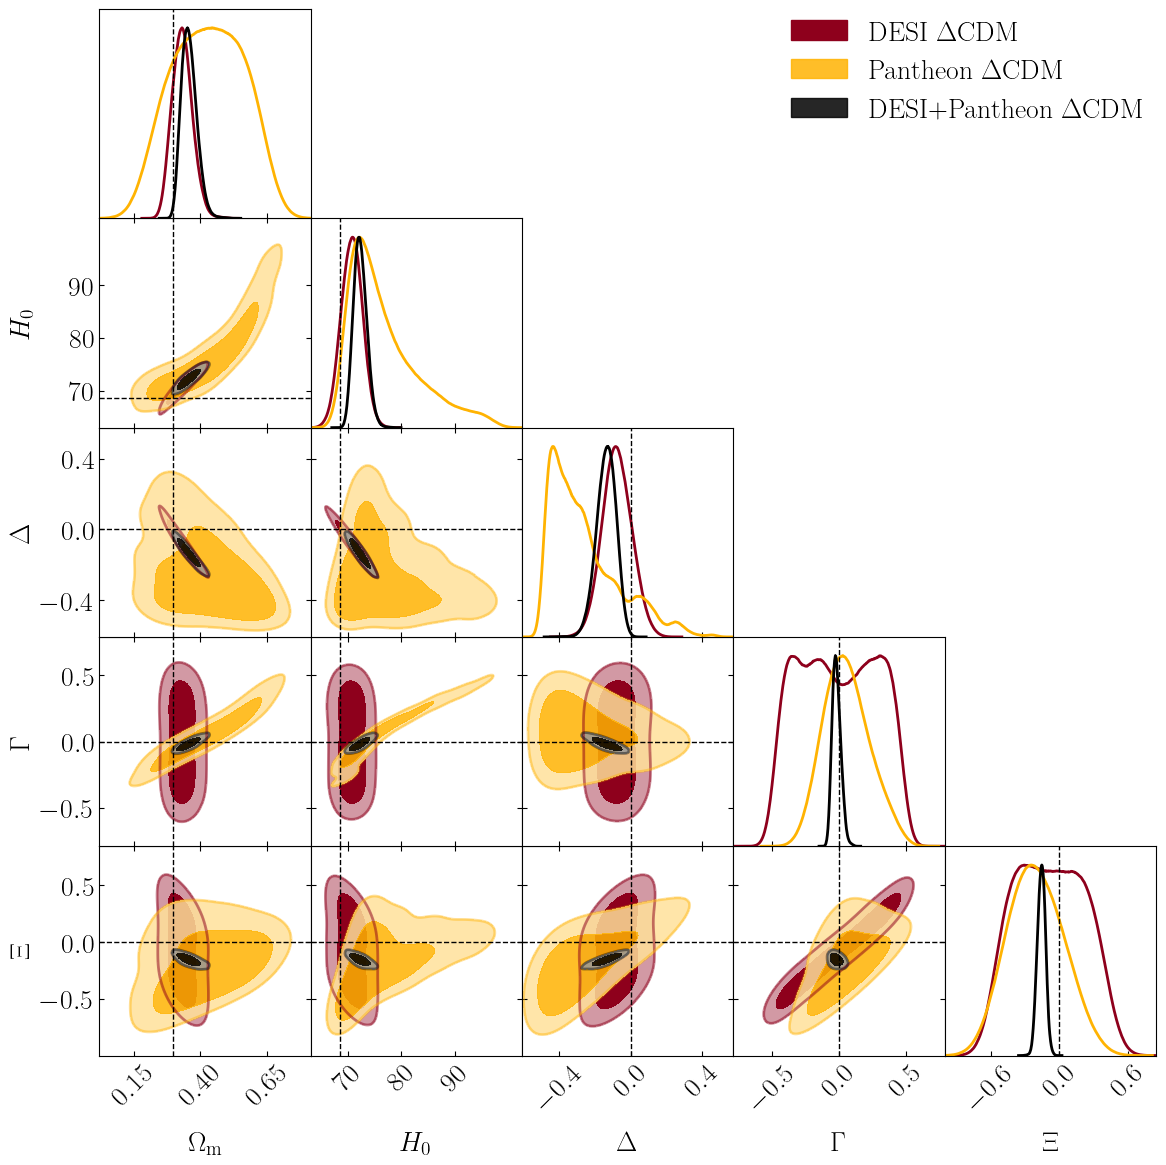

In [11]:
if len(analyzed_chains) > 0:
    g = plots.get_subplot_plotter(subplot_size=1,width_inch=12, scaling=False)
    g.settings.figure_legend_frame = False
    g.settings.axes_fontsize=20
    g.settings.axes_labelsize=20
    g.settings.legend_fontsize=20
    g.settings.axis_marker_color = 'black'
    g.settings.axis_marker_ls = '--'
    g.settings.axis_marker_lw = 1
    g.settings.axis_tick_x_rotation = 45
    g.triangle_plot([result['sample'] for result in analyzed_chains.values()], fiducial.keys(),
        filled=[result['filled'] for result in analyzed_chains.values()],
        legend_loc='upper right',
        legend_labels=[name for name in analyzed_chains.keys()],
        contour_colors=[result['color'] for result in analyzed_chains.values()],
        contour_lws=2,
        markers=fiducial)
    g.fig.align_ylabels()
    g.fig.align_xlabels();